### Sales Analysis

Import Necessary Libraries

In [1]:
import pandas as pd
import os

Task 1: Merging 12 months of sales data into a single CSV file 

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)

PermissionError: [Errno 13] Permission denied: 'all_data.csv'

Read in updated column

In [ ]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data

Drop rows of NaN

In [ ]:
all_data.dropna(axis = 0, how = 'all', inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find 'Or' and delete it

In [ ]:
all_data = all_data[(all_data['Order Date'].str[0:2] != 'Or')]

Convert columns to the correct type

In [ ]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float32')

Argument data with additional columns

Task 2: Add Month Column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2] 
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Task 3: Add City Column

In [ ]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}, {get_state(x)}")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA"
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA"


Question 1 : What was the best month for sales? How much was earned that month?

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [ ]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.375,1.822257e+06
2,13449,2188884.750,2.202022e+06
3,17005,2791207.750,2.807100e+06
4,20558,3367671.000,3.390670e+06
5,18667,3135125.000,3.152607e+06
6,15253,2562025.500,2.577802e+06
7,16072,2632539.500,2.647776e+06
8,13448,2230345.500,2.244468e+06
9,13109,2084992.125,2.097560e+06


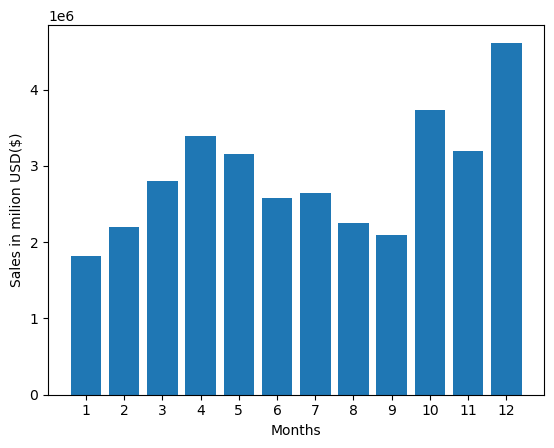

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in milion USD($)')

plt.show()

Question 2: What city sold the most product?

In [ ]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2779908.250,104794,2.795499e+06
"Austin, TX",11153,1809873.625,69829,1.819582e+06
"Boston, MA",22528,3637409.750,141112,3.661642e+06
"Dallas, TX",16730,2752627.750,104620,2.767975e+06
"Los Angeles, CA",33289,5421435.000,208325,5.452571e+06
"New York City, NY",27932,4635371.000,175741,4.664317e+06
"Portland, ME",2750,447189.250,17144,4.497583e+05
"Portland, OR",11303,1860558.250,70621,1.870732e+06
"San Francisco, CA",50239,8211461.500,315520,8.262204e+06


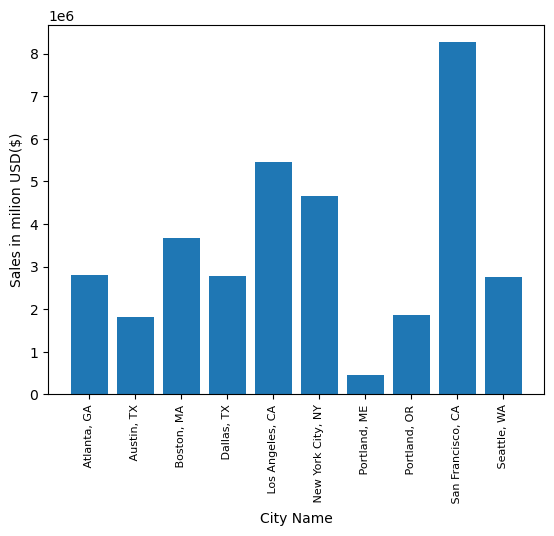

In [ ]:
cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities, all_data.groupby(['City']).sum()['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in milion USD($)')

plt.show()

Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX",23.900000,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA",99.989998,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",600.000000,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",11.990000,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA",11.990000,9,27


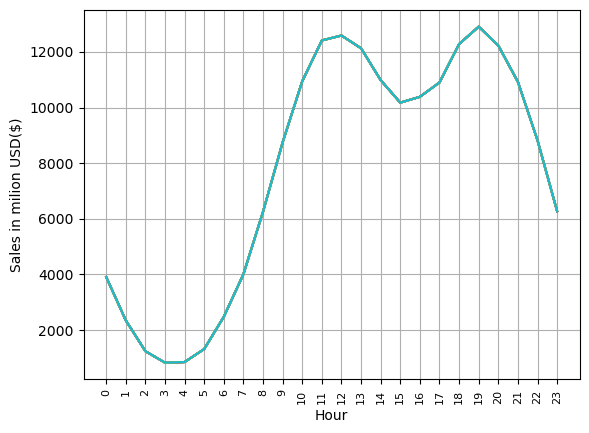

In [ ]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours, rotation = 'vertical', size=8)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Sales in milion USD($)')

plt.show()

Question 4: What products are most often sold together?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_27540\609569313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Question 5: What product sold the most? Why do you think it sold the most?

In [ ]:
product_group = all_data.groupby(['Product'])
quantity_ordered = product_group.sum()['Quantity Ordered']

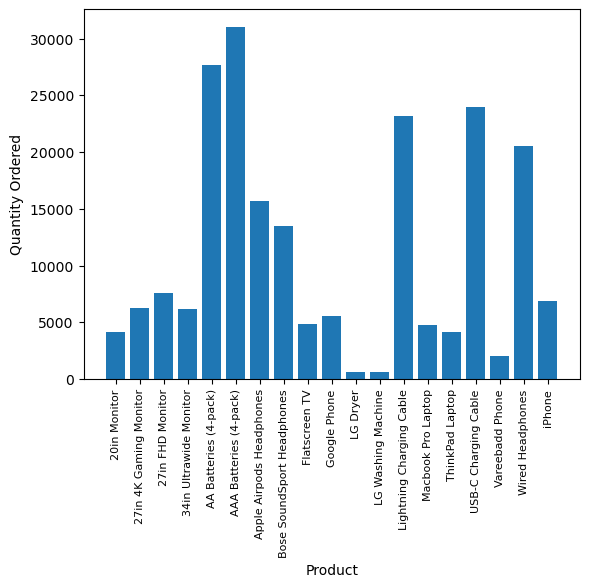

In [ ]:
products = [product for product, df in all_data.groupby(['Product'])]

plt.bar(products, all_data.groupby(['Product']).sum()['Quantity Ordered'])
plt.xticks(products, rotation = 'vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_27540\462597628.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\Asus\AppData\Local\Temp\ipykernel_27540\462597628.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


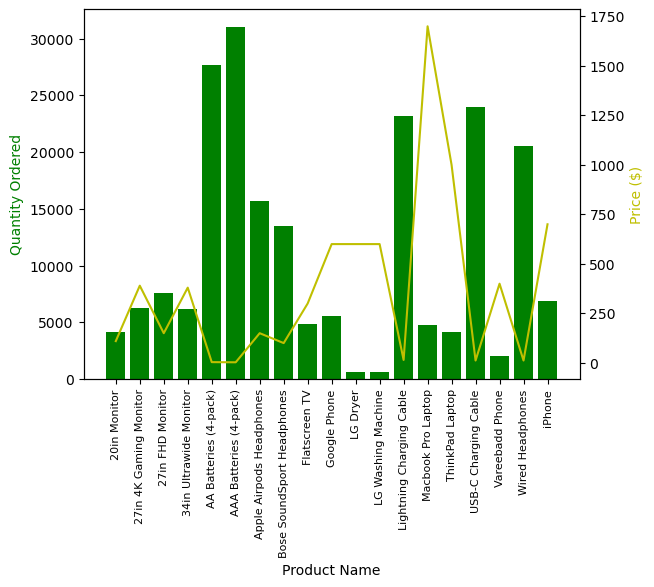

In [ ]:
prices = all_data.groupby(['Product']).mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='b')
ax2.plot(products, prices, color='y')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='y')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()